<a href="https://colab.research.google.com/github/jaider4567/taller-colonia-de-hormigas/blob/main/taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Workshop II - Swarm Intelligence and Sinergy: Ant Colony for the Traveling Salesman Problem


##Code:

Se definen las funciones para generar ciudades aleatoriamente con coordenadas(x,y,z) y luego se define una funcion que calcula la distancia entre dos ciudades usando la ecuacion euclideana

In [2]:
import numpy as np
def generate_cities(number_cities: int) -> np.ndarray:

    """
    it generates a list cities and return it
    """

    cities = np.random.rand(number_cities, 3)
    return cities


def calculate_distance(point_1: np.array, point_2: np.array) -> float:

    """
      calculate the distance between two points using the euclidean formula and return the distance
    """

    return np.sqrt(np.sum((point_2 - point_1)**2))

Se crea una funcion que permite encontrar la ruta mas corta que pase por todas las ciudades usando el algoritmo de la colonia de hormigas

In [3]:
def ant_colony_optimization(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):

    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.
    """
    # get the size of the array cities and define the pheromone array with ones using np.ones of the same size
    number_cities =  cities.shape[0]
    pheromone = np.ones((number_cities, number_cities))

    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city

                #define the equation for the ants, using alpha, beta, pheromones array, and the function calculate_distance
                for i, unvisited_city in enumerate(unvisited):
                    probabilities[i] = (pheromone[current_city, unvisited_city] ** alpha) * \
                                        ((1 / -(calculate_distance(cities[current_city], cities[unvisited_city])) ** beta))

                # normalize probabilities, it means, the sum of all probabilities is 1
                # HERE add normalization for calculated probabilities
                probabilities /= np.sum(probabilities)

                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
    return best_path, best_path_length

Se definen los parametros con los que trabaja la funcion de colonia de hormigas los cuales son numero de ciudades, numero de hormigas, numero de iteraciones, alpha, beta, tasa de evaporacion, y la intensidad del rastro de feromonas

In [11]:
# model parameters
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)



[26, 37, 35, 29, 18, 7, 4, 38, 9, 43, 46, 32, 12, 49, 45, 5, 25, 22, 41, 15, 11, 20, 14, 6, 30, 39, 2, 47, 23, 27, 31, 48, 17, 1, 13, 40, 33, 42, 16, 19, 24, 44, 36, 0, 21, 3, 28, 10, 8, 34]
14.555870538121201


Se realizan algunas pruebas variando los parametros que se le pasan a la funcion para determinar que tanta influencia tienen en el resultado y como optimizar el valor de estos parametros

Primero variamos el numero de hormigas, el numero de ciudades y numero de iteraciones

In [12]:
# model parameters
number_cities = 50
number_ants = 200
number_iterations = 10
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[37, 26, 7, 48, 0, 43, 49, 4, 13, 36, 23, 16, 33, 24, 5, 20, 21, 9, 11, 25, 30, 6, 46, 17, 18, 44, 47, 12, 2, 40, 15, 8, 22, 31, 35, 38, 1, 10, 39, 32, 14, 27, 45, 34, 28, 41, 19, 29, 3, 42]
13.732454206406619


In [31]:
number_cities = 50
number_ants = 300
number_iterations = 10
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[23, 14, 11, 13, 30, 44, 39, 5, 36, 45, 48, 22, 6, 41, 18, 38, 17, 3, 16, 26, 9, 4, 20, 40, 15, 21, 47, 28, 12, 19, 31, 7, 1, 33, 37, 49, 29, 32, 0, 46, 2, 25, 34, 42, 10, 27, 35, 8, 24, 43]
12.864009675362395


In [32]:
number_cities = 20
number_ants = 300
number_iterations = 20
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[5, 4, 13, 19, 14, 3, 12, 7, 9, 6, 17, 15, 10, 2, 8, 0, 11, 1, 16, 18]
5.900717431325441


In [38]:
number_cities = 20
number_ants = 100
number_iterations = 50
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[10, 6, 14, 8, 11, 15, 12, 7, 16, 13, 18, 2, 19, 5, 9, 17, 3, 4, 0, 1]
5.135833685876931


ahora comenzamos a variar lo parametros, alpha, beta, evaporation_rate y Q

In [17]:
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 2
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[5, 38, 40, 23, 36, 21, 10, 25, 0, 9, 3, 16, 26, 13, 41, 6, 43, 31, 48, 34, 18, 29, 33, 28, 27, 15, 44, 35, 4, 32, 7, 30, 47, 1, 20, 19, 17, 46, 2, 24, 12, 42, 45, 11, 22, 8, 14, 39, 49, 37]
12.006656624507984


In [20]:
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 2
beta = 2
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[5, 37, 12, 35, 27, 36, 7, 0, 41, 10, 1, 21, 49, 38, 25, 48, 29, 16, 39, 20, 32, 14, 17, 47, 33, 4, 30, 18, 8, 15, 45, 46, 22, 43, 40, 23, 28, 13, 2, 6, 3, 9, 44, 19, 26, 24, 11, 42, 34, 31]
10.018574483518766


In [21]:
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 0.4
beta = 0.4
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[21, 12, 30, 27, 26, 11, 46, 38, 41, 4, 44, 10, 37, 0, 33, 28, 6, 15, 49, 35, 19, 16, 7, 14, 18, 5, 8, 9, 47, 39, 36, 48, 22, 34, 43, 45, 24, 1, 40, 17, 31, 13, 32, 23, 2, 29, 25, 3, 20, 42]
24.014048768402688


In [24]:
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 2
beta = 2
evaporation_rate = 0.6
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[24, 46, 49, 30, 6, 23, 40, 18, 14, 33, 47, 34, 35, 4, 19, 39, 2, 9, 16, 44, 29, 7, 8, 11, 0, 25, 10, 3, 27, 31, 28, 41, 17, 38, 5, 12, 21, 37, 42, 22, 13, 15, 26, 1, 20, 45, 36, 43, 32, 48]
10.46425355146338


In [29]:
number_cities = 50
number_ants = 100
number_iterations = 10
alpha = 2
beta = 2
evaporation_rate = 0.5
Q = 0.3

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[8, 25, 46, 22, 3, 24, 47, 34, 32, 7, 26, 18, 16, 40, 28, 1, 20, 14, 31, 37, 9, 43, 23, 6, 11, 42, 5, 33, 48, 39, 29, 10, 49, 19, 27, 0, 45, 4, 44, 17, 30, 41, 12, 2, 13, 35, 21, 36, 38, 15]
10.893394656854724


In [30]:
number_cities = 100
number_ants = 200
number_iterations = 30
alpha = 2
beta = 2
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[36, 24, 42, 84, 35, 50, 71, 34, 56, 6, 25, 63, 38, 95, 40, 80, 45, 27, 32, 82, 0, 91, 17, 98, 37, 49, 18, 72, 97, 60, 92, 61, 65, 66, 3, 2, 31, 43, 79, 16, 59, 53, 46, 26, 41, 21, 48, 5, 74, 1, 68, 51, 64, 77, 88, 93, 30, 52, 10, 19, 81, 12, 47, 87, 75, 11, 14, 67, 13, 78, 29, 90, 20, 15, 9, 22, 4, 7, 89, 58, 39, 70, 99, 33, 57, 96, 55, 8, 23, 85, 83, 76, 54, 86, 28, 73, 62, 44, 69, 94]
18.62536706679396


In [37]:
number_cities = 100
number_ants = 200
number_iterations = 10
alpha = 2
beta = 2
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[75, 54, 85, 92, 11, 34, 0, 89, 71, 88, 2, 60, 4, 69, 86, 19, 21, 14, 23, 13, 42, 61, 6, 36, 35, 56, 32, 37, 70, 50, 5, 45, 59, 15, 33, 98, 64, 40, 82, 12, 41, 84, 17, 55, 72, 27, 51, 79, 78, 53, 1, 94, 20, 16, 10, 68, 38, 26, 9, 93, 8, 91, 90, 44, 73, 47, 76, 97, 96, 30, 28, 29, 58, 63, 18, 65, 66, 3, 67, 22, 81, 7, 87, 62, 99, 80, 49, 52, 25, 95, 43, 74, 39, 48, 24, 77, 46, 57, 31, 83]
17.591204788174686


In [34]:
number_cities = 20
number_ants = 300
number_iterations = 30
alpha = 2
beta = 2
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[0, 17, 15, 5, 16, 2, 1, 7, 13, 8, 12, 4, 19, 10, 11, 14, 3, 9, 18, 6]
5.485463666229828


In [42]:
number_cities = 50
number_ants = 100
number_iterations = 30
alpha = 2
beta = 2
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)
print(best_path)
print(best_path_length)

[19, 35, 9, 41, 29, 31, 12, 49, 48, 20, 46, 25, 36, 8, 39, 37, 32, 5, 0, 16, 6, 10, 15, 47, 45, 44, 28, 17, 1, 11, 27, 33, 38, 3, 13, 26, 42, 7, 30, 21, 40, 18, 34, 43, 24, 22, 14, 2, 23, 4]
10.312149143551434


Finalmente usando matplotlib se grafica la ruta que nos ha arrojado la colonia de hormigas, en donde los puntos representas las ciudades y las lineas las rutas que hay que seguir.

Best path: [19, 35, 9, 41, 29, 31, 12, 49, 48, 20, 46, 25, 36, 8, 39, 37, 32, 5, 0, 16, 6, 10, 15, 47, 45, 44, 28, 17, 1, 11, 27, 33, 38, 3, 13, 26, 42, 7, 30, 21, 40, 18, 34, 43, 24, 22, 14, 2, 23, 4]
Best path length: 10.312149143551434


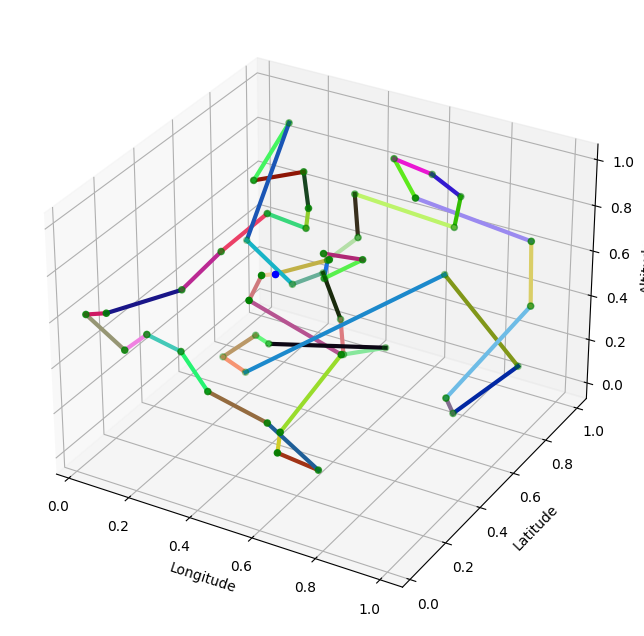

In [43]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()


print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)

#Informe
##Tiempo de ejecucion:
Tras haber realizado varias pruebas variando los parametros que recibe la funcion ant_colony_optimization(), se pudo observar que los parametros numero_de_ciudades, iteraciones y cantidad_hormigas tenian un peso similar en el tiempo de ejecucion, y su influencia depende de los otros dos parametros, por ejemplo si aumentamos el numero de iteraciones pero el numero de ciudades y de hormigas es bajo, el tiempo no aumenta mucho(alrededor de un 10%), pero si aumentamos el numero de iteraciones y el numero de ciudades y de cantidad de hormigas es grande(alrededor de 200 o mas), el tiempo aumenta en gran medida,como el caso de la prueba que se hizo con:
number_cities = 100
number_ants = 200
number_iterations = 30
que el tiempo de ejecucion duro  minutos siendo el tiempo mas largo registrado.

Esto evidencia que el tiempo de ejecucion tiene un crecimiento exponencial a medida que aumentan estos tres parametros.

##Optimizacion de la distancia
Tras realizar varias pruebas variando los valores alpha, beta, tasa de evaporacion e influencia de feromonas, se determino que los mejores resultados se obtenian aproximadamente en los siguientes valores:
alpha = 2

beta = 2

evaporation_rate = 0.5

Q = 1

Igualmente se determino que entre mayor numero de iteraciones y mayor numero de hormigas habia mayor precision, pero a partir de las 30 iteraciones y de las 200 hormigas el cambo no era muy significativo, y lo que generaba era mayor tiempo de ejecucion sin que valiera la pena.

Por otro lado a mayor numero de ciudades la precision es menor y cada vez que existan mas ciudades necesitara de mas cantidad de hormigas e iteraciones o de lo contrario a muchas ciudades el algoritmo puede tener grandes imprecisiones.

##dificultades
Aunque se logro hacer un gran numero de pruebas para determinar la importancia de cada parametro, aun asi no se tenian los recursos necesarios para realizar una gran cantidad de pruebas que permitieran determinar con mayor precision la importancia de cada parametro debido a que en algunas ocasiones el tiempo de ejecucion seria muy largo si los parametros toman valores extremadamente altos.